In [59]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import explained_variance_score
from sklearn.metrics import max_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import mean_poisson_deviance
from sklearn.metrics import mean_gamma_deviance
from sklearn.metrics import mean_tweedie_deviance
import sklearn.neural_network

In [99]:
# Load data from data folder
df = pd.read_csv('data/data_complete_final.csv')
df.head()

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,OBJECTID,soruce_length,source_area,landslide_ID,deposit_area,CONFIDENCE,MATERIAL,...,mean_rough,std_rough,min_slope,max_slope,mean_slope,std_slope,min_asp,max_asp,mean_asp,std_asp
0,0,0,0,1,3851.588931,147260.070502,5600,531934.562792,moderate,Earth or debris,...,18.773749,8.939351,2.742452,32.380558,15.358492,7.426611,56.121899,139.231140,99.910784,19.231195
1,1,1,1,2,478.577643,7375.893616,5601,13973.308516,low,Earth or debris,...,24.181767,3.681896,14.538154,24.222824,18.963466,2.223287,19.342522,283.361267,160.748465,57.927951
2,2,2,2,3,621.878585,9097.112403,5602,25699.961862,low,Earth or debris,...,18.422395,6.574039,3.696535,22.295137,14.502633,5.365441,72.315399,225.361328,129.899027,41.212553
3,3,3,3,4,1187.857110,20648.173693,5603,94054.007176,low,Earth or debris,...,21.286560,8.332988,5.329493,27.280369,15.797822,5.754156,17.712673,213.106827,130.838004,36.269226
4,4,4,4,5,1866.133373,35616.221508,5604,90517.371084,moderate,Earth or debris,...,18.165191,8.389121,2.155986,25.588272,13.185511,6.302846,121.775955,250.843674,158.335124,27.768627


In [101]:
#define features and target
# features = df[['Shape_Leng','source_area','LANDSLIDE_','geom_source','deposit_area','CONFIDENCE','MATERIAL','VOLUME_FT3','SLOPE_DEG','HS_HEIGHT_','FAIL_DEPTH','geom_deposit']]
features = df[['soruce_length','source_area','deposit_area','CONFIDENCE','MATERIAL','SLOPE_DEG','FAIL_DEPTH', 'mean_rough',	'std_rough',	'min_slope'	,'max_slope'	,'mean_slope'	,'std_slope'	,'min_asp',	'max_asp',	'mean_asp',	'std_asp']]
target = df['VOLUME_FT3']

#one hot encoding
features = pd.get_dummies(features, columns=['soruce_length','source_area','deposit_area','CONFIDENCE','MATERIAL','SLOPE_DEG','FAIL_DEPTH', 'mean_rough',	'std_rough',	'min_slope'	,'max_slope'	,'mean_slope'	,'std_slope'	,'min_asp',	'max_asp',	'mean_asp',	'std_asp'])
train, test, train_labels, test_labels = train_test_split(features, target, test_size = 0.2, random_state = 42)
train, val, train_labels, val_labels = train_test_split(train, train_labels, test_size = 0.2, random_state = 42)



In [102]:
#with the validation set find the best number of hidden layers and neurons
#create table to analyze the results
d = []
for i in range(1, 4):
    for j in range(1, 4):
        model = sklearn.neural_network.MLPRegressor(hidden_layer_sizes=(i,j), activation='relu', solver='adam', max_iter=1000, random_state=42)
        model.fit(train, train_labels)
        predictions = model.predict(val)
        # add it to the list d
        d.append([i, j, mean_squared_error(val_labels, predictions)])
        print("Hidden layers: ", i, "Neurons: ", j, "Mean Squared Error: ", mean_squared_error(val_labels, predictions))

#with the validation set find the best activation function







/Users/caleblykken/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


Hidden layers:  1 Neurons:  1 Mean Squared Error:  7.380527279009766e+17


/Users/caleblykken/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Hidden layers:  1 Neurons:  2 Mean Squared Error:  7.380516446728842e+17


/Users/caleblykken/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Hidden layers:  1 Neurons:  3 Mean Squared Error:  7.380526900099258e+17


/Users/caleblykken/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Hidden layers:  2 Neurons:  1 Mean Squared Error:  7.380527266053847e+17


/Users/caleblykken/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Hidden layers:  2 Neurons:  2 Mean Squared Error:  7.380484792535132e+17


/Users/caleblykken/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Hidden layers:  2 Neurons:  3 Mean Squared Error:  7.380484744241366e+17


/Users/caleblykken/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Hidden layers:  3 Neurons:  1 Mean Squared Error:  7.380527266921865e+17


/Users/caleblykken/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Hidden layers:  3 Neurons:  2 Mean Squared Error:  7.380505578489032e+17
Hidden layers:  3 Neurons:  3 Mean Squared Error:  7.380506416877768e+17


/Users/caleblykken/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[[1, 1, 7.380527279009766e+17],
 [1, 2, 7.380516446728842e+17],
 [1, 3, 7.380526900099258e+17],
 [2, 1, 7.380527266053847e+17],
 [2, 2, 7.380484792535132e+17],
 [2, 3, 7.380484744241366e+17],
 [3, 1, 7.380527266921865e+17],
 [3, 2, 7.380505578489032e+17],
 [3, 3, 7.380506416877768e+17]]

In [109]:

model = sklearn.neural_network.MLPRegressor(hidden_layer_sizes=(2,3), activation='relu', solver='adam', alpha=0.0001, batch_size='auto',
                                            learning_rate='constant', learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True,
                                            random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9,
                                            nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9,
                                            beta_2=0.999, epsilon=1e-08, n_iter_no_change=10, max_fun=15000)
model.fit(train, train_labels)
predictions = model.predict(test)
print(predictions)






[270.31943082 253.4679482  244.77772543 256.72069992 265.07663743
 263.1585304  254.08510621 247.51442839 245.20403575 248.80253457
 285.85672869 260.79802218 295.28408864 237.35186516 251.54321269
 246.04381709 247.91887017 244.35920228 255.99794653 245.13559454
 268.4346366  245.75292525 268.52422897 272.23255952 237.24531772
 268.98644356 259.47129758 263.44824094 253.37025252 254.67162183
 224.96007563 243.76855986 260.26739058 258.38928773 235.3990831
 248.29945935 262.60595044 236.2332197  265.67560327 243.05867125
 243.81186187 329.02024647 224.58969722 244.72681798 267.62998695
 258.72038877 265.27340432 249.90490003 228.05954277 289.48128751
 246.60162564 274.1852748  246.91101327 229.8157802  242.12010756
 254.01715779 255.51961368 238.82149385 275.36089279 241.45789375
 266.63612268 264.11978441 257.67175725 242.60207652 253.66124865
 305.13673471 251.86234608 273.72928926 233.90217913 252.60308661
 257.63215409 249.16527896 212.75059294 257.11746241 264.3163714
 237.5341559

/Users/caleblykken/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


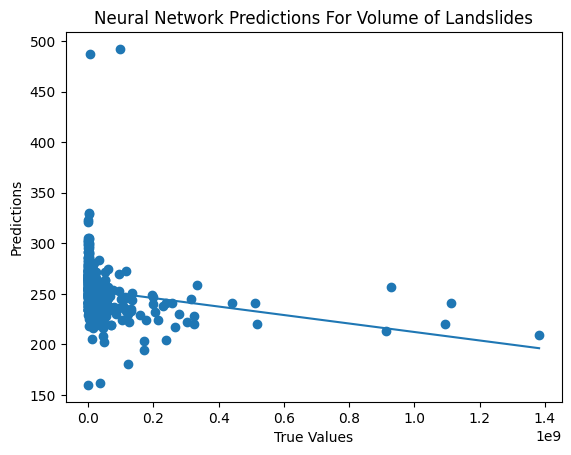

1.5778427613979486e+16

In [116]:


#graph the accuracy
plt.scatter(test_labels, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
# add a line for perfect correlation
plt.plot(np.unique(test_labels), np.poly1d(np.polyfit(test_labels, predictions, 1))(np.unique(test_labels)))
#label the graph
plt.title('Neural Network Predictions For Volume of Landslides')
plt.show()
#print accuracy
accuracy = model.score(test, test_labels)
accuracy = accuracy * 100

#print mean squared error
mse = mean_squared_error(test_labels, predictions)
mse